[*********************100%%**********************]  1 of 1 completed


C:\Users\DELL\AppData\Local\Temp\ipykernel_4836\4092268781.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['MA5'] > data['MA10']] = 1  # 1表示买入信号
C:\Users\DELL\AppData\Local\Temp\ipykernel_4836\4092268781.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['MA5'] < data['MA10']] = -1  # -1表示卖出信号


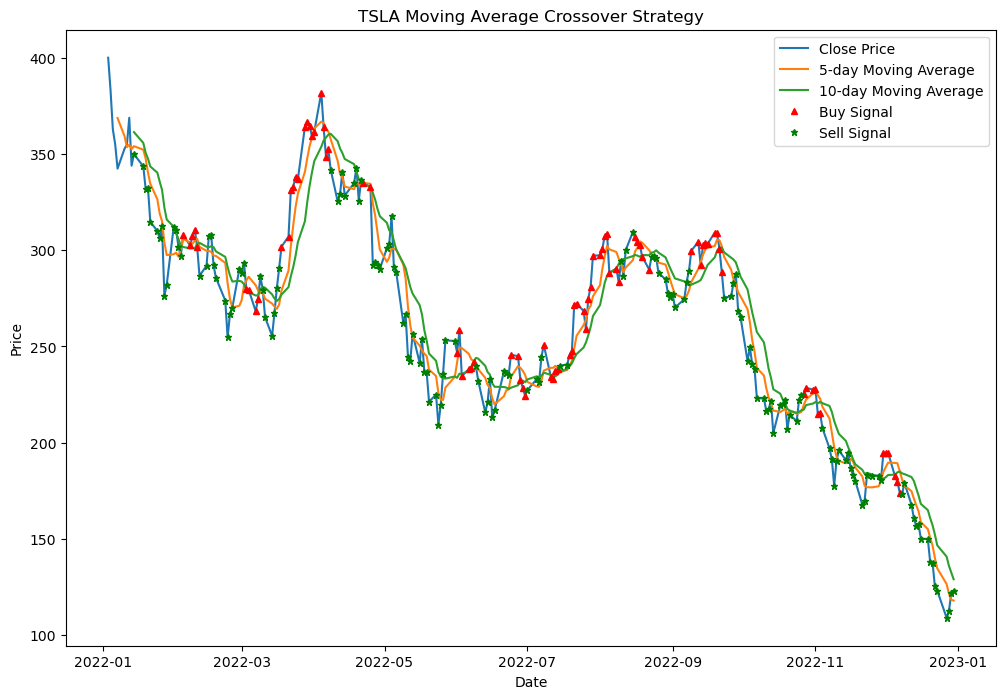

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# 获取股票数据
symbol = "TSLA"
start_date = "2022-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# 计算短期（50天）和长期（100天）移动平均线
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()

# 生成交易信号
data['Signal'] = 0  # 0表示无信号
data['Signal'][data['MA5'] > data['MA10']] = 1  # 1表示买入信号
data['Signal'][data['MA5'] < data['MA10']] = -1  # -1表示卖出信号

# 计算持仓变化
data['Position'] = data['Signal'].diff()

# 绘制交易信号和移动平均线
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA5'], label='5-day Moving Average')
plt.plot(data['MA10'], label='10-day Moving Average')

# 标记买卖信号
plt.plot(data[data['Signal'] == 1].index,
         data['Close'][data['Signal'] == 1],
         '^', markersize=5, color='r', label='Buy Signal')

plt.plot(data[data['Signal'] == -1].index,
         data['Close'][data['Signal'] == -1],
         '*', markersize=5, color='g', label='Sell Signal')

plt.title(f'{symbol} Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1]:
!pip install yfinance
import yfinance as yf 

Defaulting to user installation because normal site-packages is not writeable


In [7]:
data['Close'][data['Signal'] == 1]

Date
2022-02-04    307.773346
2022-02-07    302.446655
2022-02-08    307.333344
2022-02-09    310.666656
2022-02-10    301.516663
                 ...    
2022-12-01    194.699997
2022-12-02    194.860001
2022-12-05    182.449997
2022-12-06    179.820007
2022-12-07    174.039993
Name: Close, Length: 85, dtype: float64

In [8]:
data[data['Signal'] == 1]

,Open,High,Low,Close,Adj Close,Volume,MA5,MA10,Signal,Position
Date,,,,,,,,,,
2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400,305.872662,301.644998,1,2.0
2022-02-07,307.929993,315.923340,300.903320,302.446655,302.446655,60994500,303.913995,300.889664,1,0.0
2022-02-08,301.843323,308.763336,298.266663,307.333344,307.333344,50729100,303.297333,301.009665,1,0.0
2022-02-09,311.666656,315.423340,306.666656,310.666656,310.666656,52259400,305.053333,300.829330,1,0.0
2022-02-10,302.790009,314.603333,298.899994,301.516663,301.516663,66126900,305.947333,303.344330,1,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-01,197.080002,198.919998,191.800003,194.699997,194.699997,80046200,187.201999,182.034999,1,0.0
2022-12-02,191.779999,196.250000,191.110001,194.860001,194.860001,73645900,189.601999,183.203999,1,0.0
2022-12-05,189.440002,191.270004,180.550003,182.449997,182.449997,93122700,189.507999,183.429999,1,0.0


In [1]:
pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
